### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load the Dataset

In [2]:
df=pd.read_csv('headlines.csv', header = None)
df

,0
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...
...,...
2220,India opens skies to competition\n \n India wi...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...
2222,Survey confirms property slowdown\n \n Governm...
2223,High fuel prices hit BA's profits\n \n British...


In [3]:
df.iloc[1,:].values

array(['Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland\'s Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland\'s six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee\'s decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots, the Royal Highland Fusiliers and the Argyll and Sutherland Highlanders. In October, the Council of Scottish Colonels proposed the merger of the Royal Scots and the King\'s O

In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

In [5]:
wnl = WordNetLemmatizer()
swords = stopwords.words('english')

In [6]:
def lemmatize(word):
    tag = pos_tag([word])
    pos = 'n' # By default
    if tag[0][1].startswith('N'): # Noun
        pos='n'
    elif tag[0][1].startswith('V'): # Verb
        pos='v'
    elif tag[0][1].startswith('R'): # Adverb
        pos='r'
    if tag[0][1].startswith('J'): # Adjective; Tag start with 'J' but WNL requires 'a'
        pos='a'
    return wnl.lemmatize(word,  pos=pos)

In [7]:
lemmatize('the')

'the'

In [8]:
def clean_data(sent):
    # Tokenization, Removing Punctuation and Removing Stopwords
    words = [word.lower() for word in word_tokenize(sent) if word.lower() not in swords and word.isalnum()]
    tokens = [lemmatize(token) for token in words]
    return tokens

In [9]:
sent = 'Hello Friends! How are you? He likes Python Programming.'

In [10]:
clean_data(sent)

['hello', 'friend', 'like', 'python', 'program']

### TF*IDF Vectorizer

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf=TfidfVectorizer(analyzer=clean_data)

In [13]:
X_new = tfidf.fit_transform(df[0])

In [14]:
X_new

<2225x22483 sparse matrix of type '<class 'numpy.float64'>'
	with 319728 stored elements in Compressed Sparse Row format>

### Create the Clusters

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(random_state=0) # By default, default n_clusters = 8

In [17]:
kmeans.fit_predict(X_new)

c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array([4, 6, 4, ..., 2, 5, 2])

In [18]:
set(kmeans.labels_)

{0, 1, 2, 3, 4, 5, 6, 7}

In [19]:
kmeans.inertia_
# Higher the 'k' values i.e. number of cluster means Decrease in the SSE (Inertia) [Inverse Proportionality]

2067.496919411737

### Elbow Method

In [20]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit_predict(X_new)
    sse.append(km.inertia_)

In [21]:
sse

[2158.1638456648802,
 2136.7371877395954,
 2120.65464857829,
 2110.2507559604214,
 2093.210248790616,
 2084.606644836629,
 2079.549640885244,
 2067.496919411737,
 2062.427172132047,
 2055.0892624682315,
 2046.512805310553,
 2040.8698732414307,
 2034.6764514343831,
 2030.0046084142634,
 2025.6996559473744]

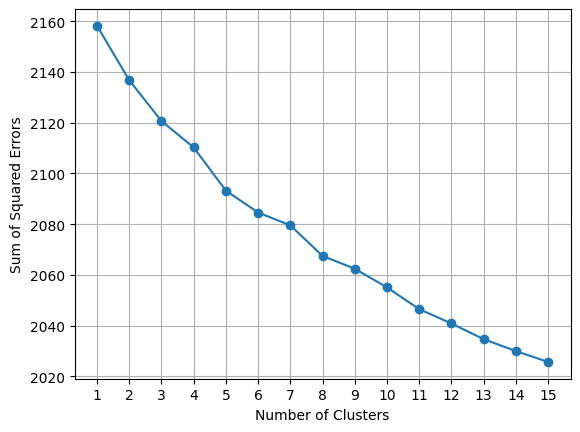

In [22]:
plt.plot(range(1,16), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.xticks(range(1,16))
plt.grid()

In [23]:
kmeans = KMeans(n_clusters = 5,random_state=0, n_init='auto') # By default, default n_clusters = 8

In [24]:
labels = kmeans.fit_predict(X_new)

In [25]:
labels

array([4, 3, 4, ..., 3, 3, 3])

### Seperate the clusters

In [26]:
zero = df[labels==0]
one = df[labels==1]
two = df[labels==2]
three = df[labels==3]
four = df[labels==4]

In [27]:
for i in set(labels):
    print(f'Cluster-{i}: ',len(df[labels==i]))

Cluster-0:  376
Cluster-1:  331
Cluster-2:  521
Cluster-3:  716
Cluster-4:  281


In [28]:
from wordcloud import WordCloud

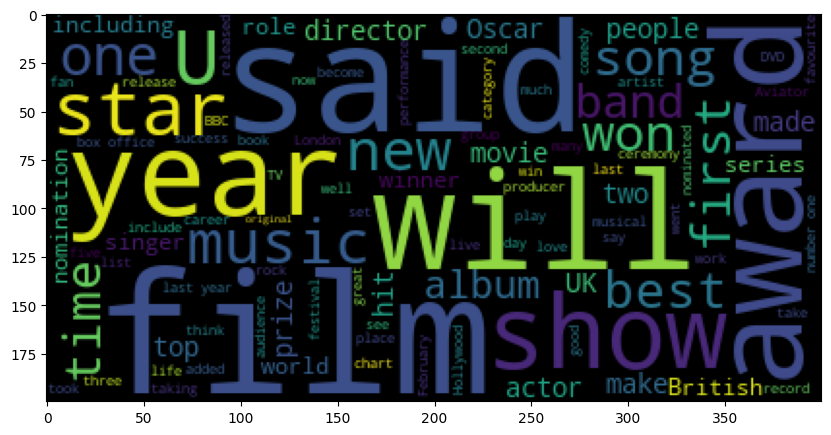

In [29]:
# for i in set(labels):
#     wc = WordCloud(max_words=100).generate(' '.join(df[labels==i][0]))
#     plt.figure(figsize=(10,8))
#     plt.imshow(wc)

# They have inbuilt ability to remove stopwords
wc = WordCloud(max_words=100).generate(' '.join(one[0]))
plt.figure(figsize=(10,8))
plt.imshow(wc)

In [30]:
from nltk import FreqDist
new = ' '.join(one[0])
clean = [word for word in word_tokenize(new) if word.lower() not in swords and word.isalnum()]
freq = FreqDist(clean)
freq.most_common(10)

[('film', 669),
 ('said', 621),
 ('best', 575),
 ('also', 337),
 ('year', 319),
 ('music', 289),
 ('show', 261),
 ('one', 250),
 ('US', 246),
 ('first', 212)]

##########################################  Cluster 00  ##########################################
##########################################  Cluster 01  ##########################################
##########################################  Cluster 02  ##########################################
##########################################  Cluster 03  ##########################################
##########################################  Cluster 04  ##########################################


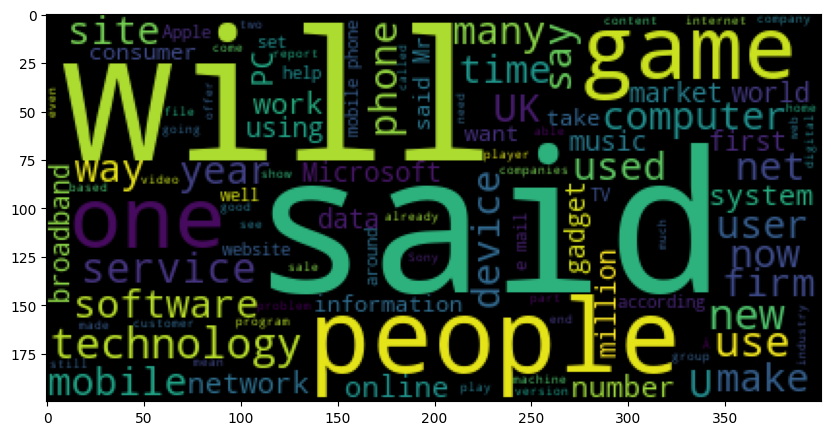

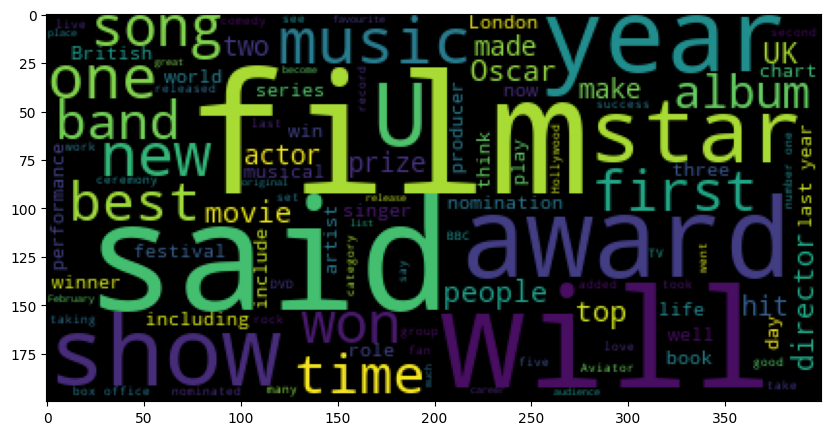

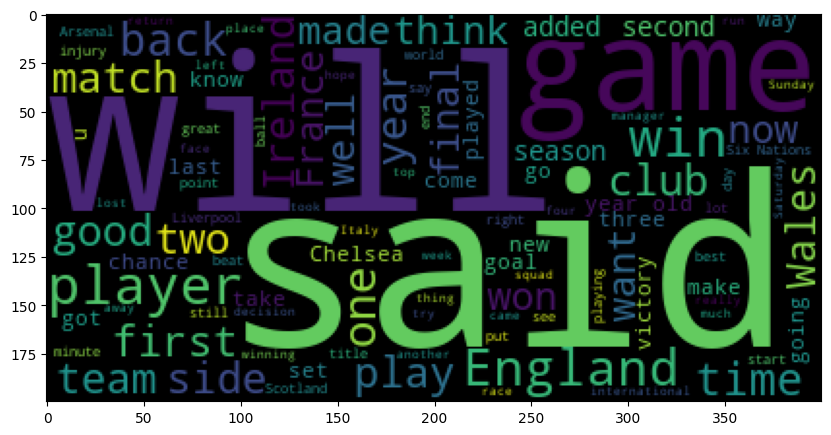

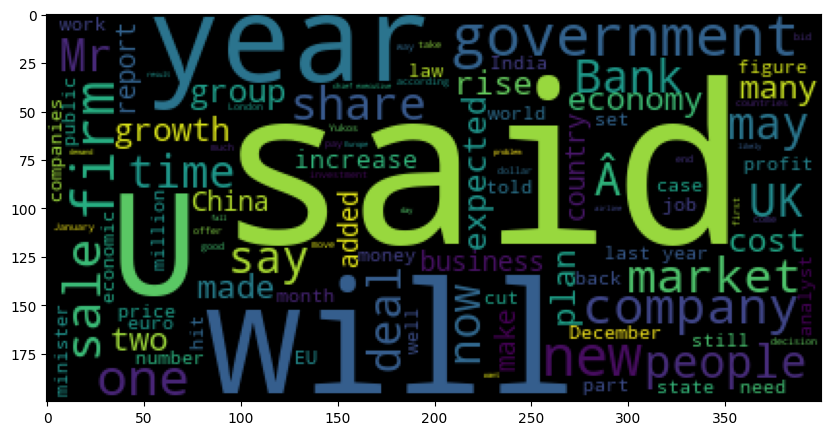

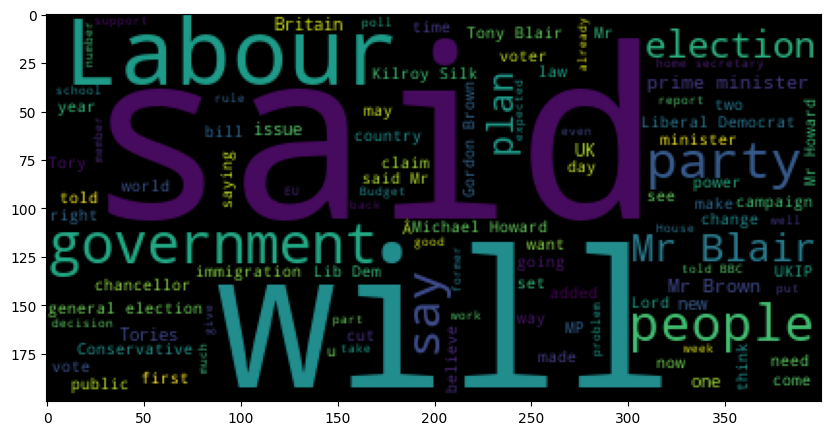

In [32]:
for i in set(labels):
    print(f'##########################################  Cluster 0{i}  ##########################################')
    wc = WordCloud(max_words=100).generate(' '.join(df[labels==i][0]))
    plt.figure(figsize=(10,8))
    plt.imshow(wc)
    
    new = ' '.join(df[labels==i][0])
    clean = [word for word in word_tokenize(new) if word.lower() not in swords and word.isalnum()]
    freq = FreqDist(clean)
    freq.most_common(10)